In [1]:
import numpy as np
import pandas as pd
import datetime
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

In [4]:
file_in = 'KSI.csv'


In [5]:
# Functions for cleaning the data

def time_cleanup(x):
    if len(x) < 3:
        h = '0'
    else:
        h = x[:-2]
    t = x[-2:]
    return h + ':' + t

def date_cleanup(x):
    return x[:10]

def find_date_time(x):
    result = x['DATE'] + ' ' + x['TIME']
    return pd.to_datetime(result)

def who_else(x):
    result = []
    
    if x['PEDESTRIAN'] == 'Yes':
        result.append('Pedestrian')
    if x['CYCLIST'] == 'Yes':
        result.append('Cyclist')
    if x['AUTOMOBILE'] == 'Yes':
        result.append('Automobile')
    if x['MOTORCYCLE'] == 'Yes':
        result.append('Motorcycle')
    if x['TRUCK'] == 'Yes':
        result.append('Truck')
    if x['TRSN_CITY_VEH'] == 'Yes':
        result.append('City Vehicle')
    if x['EMERG_VEH'] == 'Yes':
        result.append('Emergency Vehicle')
    if result == []:
        result.append('Not Recorded')   
    
    # I convert the list to a string to avoid issues with the
    # group_by function later.

    result_str = ', '.join(map(str, result))

    return result_str

def possible_motive(x):

    result = []
    
    if x['SPEEDING'] == 'Yes':
        result.append('Speeding  Related Collision')
    if x['REDLIGHT'] == 'Yes':
        result.append('Red Light Related  Collision')
    if x['ALCOHOL'] == 'Yes':
        result.append('Alcohol  Related Collision')
    if x['AG_DRIV'] == 'Yes':
        result.append('Aggressive and Distracted Driving Collision')
    if x['DISABILITY'] == 'Yes':
        result.append('Medical or Physical Disability Related Collision')
    if result == []:
        result.append('Not Recorded')
    
    # I convert the list to a string to avoid issues with the
    # group_by function later.

    result_str = ', '.join(map(str, result))

    return result_str

In [6]:
file_content = pd.read_csv(file_in,
                           nrows = None,
                           index_col='INDEX_',
                           converters = {'TIME': time_cleanup,
                                         'DATE': date_cleanup,
                                         }
                           )
file_content.head(10)

,X,Y,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387730,-8.844611e+06,5.412414e+06,892658,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
3387731,-8.844611e+06,5.412414e+06,892658,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
3388101,-8.816480e+06,5.434843e+06,892810,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3388102,-8.816480e+06,5.434843e+06,892810,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,<Null>,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
3387793,-8.822759e+06,5.424516e+06,892682,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5
3387794,-8.822759e+06,5.424516e+06,892682,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),6
3387795,-8.822759e+06,5.424516e+06,892682,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,<Null>,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),7
3388371,-8.841082e+06,5.411337e+06,892913,2006,2006/03/12,19:03,19,OSSINGTON AVE,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),8
3388372,-8.841082e+06,5.411337e+06,892913,2006,2006/03/12,19:03,19,OSSINGTON AVE,DUNDAS ST W,<Null>,...,<Null>,<Null>,Yes,<Null>,Yes,<Null>,D14,81,Trinity-Bellwoods (81),9


In [7]:
file_content.insert(3, 'DATE_TIME',file_content.apply(find_date_time, axis=1))
print(file_content.shape)
file_content.head()

(16860, 57)


,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387730,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
3387731,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
3388101,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3388102,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
3387793,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [8]:
file_content.VEHTYPE.unique()

array(['Automobile, Station Wagon', 'Other', 'Motorcycle', 'Bicycle',
       '<Null>', 'Municipal Transit Bus (TTC)', 'Truck - Open', 'Taxi',
       'Passenger Van', 'Delivery Van', 'Moped', 'Pick Up Truck',
       'Police Vehicle', 'Truck-Tractor', 'Truck - Closed (Blazer, etc)',
       'Street Car', 'Bus (Other) (Go Bus, Gray Coach)', 'Truck - Dump',
       'Construction Equipment', 'Intercity Bus', 'Truck (other)',
       'Truck - Tank', 'Other Emergency Vehicle', 'School Bus',
       'Tow Truck', 'Off Road - 2 Wheels', 'Fire Vehicle',
       'Truck - Car Carrier'], dtype=object)

In [9]:
month_dict = {1:4,
              2:4,
              3:1,
              4:1,
              5:1,
              6:2,
              7:2,
              8:2,
              9:3,
              10:3,
              11:3,
              12:4}

In [10]:
file_content['month']= file_content['DATE_TIME'].dt.month

In [11]:
file_content['Season'] = file_content['month'].map(month_dict)

In [12]:
file_content

,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,month,Season
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387730,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1,3,1
3387731,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2,3,1
3388101,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3,3,1
3388102,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4,3,1
3387793,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81509784,-8.820837e+06,5.421411e+06,1636966,2020-08-30 13:40:00,2020,2020/08/30,13:40,13,BRIMLEY RD,BARKDENE HILLS,...,Yes,<Null>,<Null>,<Null>,D41,123,Cliffcrest (123),16856,8,2
81505452,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16857,9,3
81505453,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,Yes,<Null>,<Null>,<Null>,D43,138,Eglinton East (138),16858,9,3


In [13]:
dict_injury = {'None':0,'Fatal':1,'Minor':0,'Major':0,'Minimal':0,'<Null>':0}
file_content['INJURY_Fatal_NUM'] = file_content['INJURY'].map(dict_injury)

In [14]:
dict_majinjury = {'None':0,'Fatal':0,'Minor':0,'Major':1,'Minimal':0,'<Null>':0}
file_content['INJURY_Major_NUM'] = file_content['INJURY'].map(dict_majinjury)

In [15]:
dict_mininjury = {'None':0,'Fatal':0,'Minor':1,'Major':0,'Minimal':0,'<Null>':0}
file_content['INJURY_Minor_NUM'] = file_content['INJURY'].map(dict_mininjury)

In [16]:
dict_minimalinjury = {'None':0,'Fatal':0,'Minor':0,'Major':0,'Minimal':1,'<Null>':0}
file_content['INJURY_Minimal_NUM'] = file_content['INJURY'].map(dict_minimalinjury)

In [17]:
file_content

,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId,month,Season,INJURY_Fatal_NUM,INJURY_Major_NUM,INJURY_Minor_NUM,INJURY_Minimal_NUM
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387730,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,D11,88,High Park North (88),1,3,1,0,0,0,0
3387731,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,D11,88,High Park North (88),2,3,1,1,0,0,0
3388101,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,D42,131,Rouge (131),3,3,1,1,0,0,0
3388102,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,D42,131,Rouge (131),4,3,1,0,0,0,0
3387793,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,D41,138,Eglinton East (138),5,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81509784,-8.820837e+06,5.421411e+06,1636966,2020-08-30 13:40:00,2020,2020/08/30,13:40,13,BRIMLEY RD,BARKDENE HILLS,...,D41,123,Cliffcrest (123),16856,8,2,0,1,0,0
81505452,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,D43,138,Eglinton East (138),16857,9,3,0,0,0,0
81505453,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,D43,138,Eglinton East (138),16858,9,3,0,0,1,0


In [18]:
file_content.groupby('VEHTYPE')['INJURY_Fatal_NUM'].sum()

VEHTYPE
<Null>                              330
Automobile, Station Wagon           147
Bicycle                              40
Bus (Other) (Go Bus, Gray Coach)      0
Construction Equipment                0
Delivery Van                          1
Fire Vehicle                          0
Intercity Bus                         0
Moped                                 0
Motorcycle                           73
Municipal Transit Bus (TTC)           1
Off Road - 2 Wheels                   0
Other                               222
Other Emergency Vehicle               0
Passenger Van                         3
Pick Up Truck                         1
Police Vehicle                        0
School Bus                            0
Street Car                            0
Taxi                                  0
Tow Truck                             0
Truck (other)                         0
Truck - Car Carrier                   0
Truck - Closed (Blazer, etc)          0
Truck - Dump                    

In [19]:
file_content.groupby('VEHTYPE')['INJURY_Major_NUM'].sum()

VEHTYPE
<Null>                              1257
Automobile, Station Wagon           1410
Bicycle                              652
Bus (Other) (Go Bus, Gray Coach)       1
Construction Equipment                 1
Delivery Van                           8
Fire Vehicle                           0
Intercity Bus                          1
Moped                                 21
Motorcycle                           495
Municipal Transit Bus (TTC)           12
Off Road - 2 Wheels                    1
Other                               1751
Other Emergency Vehicle                1
Passenger Van                         18
Pick Up Truck                         15
Police Vehicle                         1
School Bus                             0
Street Car                             0
Taxi                                   2
Tow Truck                              0
Truck (other)                          1
Truck - Car Carrier                    0
Truck - Closed (Blazer, etc)           7
Truck - 

In [20]:
file_content.groupby('INVTYPE')['INJURY_Major_NUM'].sum()

INVTYPE
<Null>                     0
Cyclist                  655
Cyclist Passenger          2
Driver                  1464
Driver - Not Hit           0
In-Line Skater             4
Moped Driver              26
Motorcycle Driver        494
Motorcycle Passenger      20
Other                      7
Other Property Owner       0
Passenger                725
Pedestrian              2239
Pedestrian - Not Hit       0
Trailer Owner              0
Truck Driver              21
Vehicle Owner              0
Wheelchair                11
Witness                    0
Name: INJURY_Major_NUM, dtype: int64

In [21]:
file_content.groupby('INVTYPE')['INJURY_Fatal_NUM'].sum()

INVTYPE
<Null>                    0
Cyclist                  41
Cyclist Passenger         0
Driver                  150
Driver - Not Hit          0
In-Line Skater            0
Moped Driver              0
Motorcycle Driver        73
Motorcycle Passenger      1
Other                     0
Other Property Owner      0
Passenger                89
Pedestrian              462
Pedestrian - Not Hit      0
Trailer Owner             0
Truck Driver              3
Vehicle Owner             0
Wheelchair                2
Witness                   0
Name: INJURY_Fatal_NUM, dtype: int64

In [22]:
file_content['day_ofweek'] = file_content["DATE_TIME"].dt.weekday

In [23]:
minimal_injuries_weekly = file_content.groupby(['day_ofweek','INVTYPE'])['INJURY_Minimal_NUM'].sum()
minor_injuries_weekly = file_content.groupby(['day_ofweek','INVTYPE'])['INJURY_Minor_NUM'].sum()
major_injuries_weekly = file_content.groupby(['day_ofweek','INVTYPE'])['INJURY_Major_NUM'].sum()
fatal_injuries_weekly = file_content.groupby(['day_ofweek','INVTYPE'])['INJURY_Fatal_NUM'].sum()

In [24]:
Weekly_injuries = pd.concat([fatal_injuries_weekly,major_injuries_weekly,minor_injuries_weekly,minimal_injuries_weekly],axis=1)

In [25]:
Weekly_injuries

INJURY_Fatal_NUM  INJURY_Major_NUM  \
day_ofweek INVTYPE                                                
0          <Null>                           0                 0   
           Cyclist                          3                84   
           Driver                          19               195   
           Driver - Not Hit                 0                 0   
           In-Line Skater                   0                 0   
...                                       ...               ...   
6          Passenger                       14               155   
           Pedestrian                      48               236   
           Truck Driver                     0                 0   
           Vehicle Owner                    0                 0   
           Witness                          0                 0   

                             INJURY_Minor_NUM  INJURY_Minimal_NUM  
day_ofweek INVTYPE                                                 
0          <Null>                           0                   0  
           Cyclist                          1                   3  
           Driver                          96                  75  
           Driver - Not Hit                 0                   0  
           In-Line Skater                   0                   0  
...                                       ...                 ...  
6          Passenger                      119                  85  
           Pedestrian                       7                   5  
           Truck Driver                     0                   1  
           Vehicle Owner                    0                   0  
           Witness                          0                   0  

[103 rows x 4 columns]

In [26]:
cyclist_injuries = file_content[(file_content['INVTYPE']=='Cyclist')|(file_content['INVTYPE']=='Cyclist Passenger')]

In [27]:
cyclist_injuries

,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,HOOD_ID,NEIGHBOURHOOD,ObjectId,month,Season,INJURY_Fatal_NUM,INJURY_Major_NUM,INJURY_Minor_NUM,INJURY_Minimal_NUM,day_ofweek
INDEX_,,,,,,,,,,,,,,,,,,,,,
3406945,-8.837086e+06,5.412752e+06,899910,2006-04-06 15:40:00,2006,2006/04/06,15:40,15,BAY ST,GERRARD ST W,...,76,Bay Street Corridor (76),84,4,1,0,1,0,0,3
3459568,-8.833969e+06,5.429724e+06,919534,2006-05-17 12:15:00,2006,2006/05/17,12:15,12,6 HAVENBROOK BLVD,<Null>,...,53,Henry Farm (53),141,5,1,0,1,0,0,2
3440128,-8.836740e+06,5.413183e+06,912231,2006-05-24 19:15:00,2006,2006/05/24,19:15,19,30 CARLTON ST,<Null>,...,75,Church-Yonge Corridor (75),163,5,1,0,1,0,0,2
3454387,-8.838021e+06,5.417016e+06,917581,2006-05-25 22:50:00,2006,2006/05/25,22:50,22,YONGE ST,ROSEHILL AVE,...,98,Rosedale-Moore Park (98),165,5,1,0,0,0,0,3
3421898,-8.840525e+06,5.415553e+06,905457,2006-05-26 22:14:00,2006,2006/05/26,22:14,22,BATHURST ST,DAVENPORT RD,...,96,Casa Loma (96),166,5,1,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81505416,-8.841755e+06,5.433327e+06,1551312,2020-08-18 12:35:00,2020,2020/08/18,12:35,12,HILDA AV,MOORE PARK AV,...,36,Newtonbrook West (36),16828,8,2,0,1,0,0,1
81504034,-8.823329e+06,5.421677e+06,1584883,2020-08-23 04:21:00,2020,2020/08/23,4:21,4,ST CLAIR AV E,KENNEDY RD,...,120,Clairlea-Birchmount (120),16846,8,2,0,1,0,0,6
81508595,-8.849818e+06,5.406574e+06,1600299,2020-08-25 10:11:00,2020,2020/08/25,10:11,10,ROYAL YORK RD,SIMPSON AV,...,17,Mimico (17),16848,8,2,0,1,0,0,1


In [28]:
cycle_minmal = cyclist_injuries.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
cycle_minor = cyclist_injuries.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
cycle_major = cyclist_injuries.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
cycle_fatal = cyclist_injuries.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [29]:
cyclist_total_injuries = pd.concat([cycle_fatal,cycle_major,cycle_minmal,cycle_minor],axis=1)

In [30]:
cyclist_total_injuries = cyclist_total_injuries.reset_index()

<AxesSubplot:xlabel='day_ofweek', ylabel='INJURY_Fatal_NUM'>

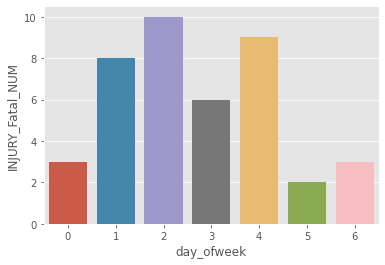

In [31]:
sns.barplot(data=cyclist_total_injuries, x='day_ofweek', y='INJURY_Fatal_NUM')

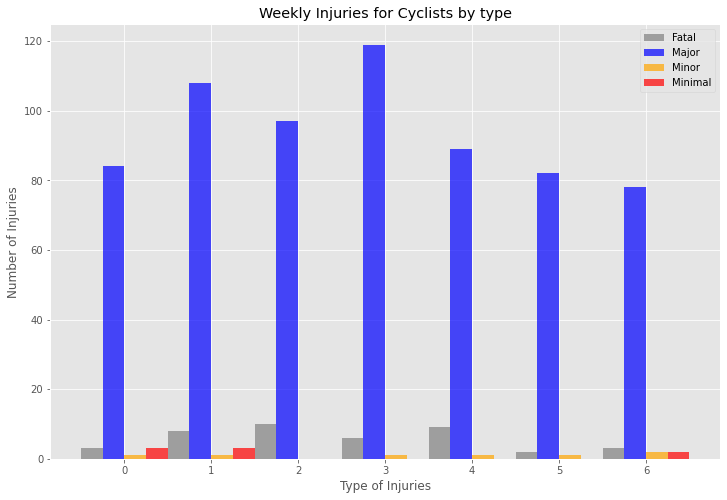

In [32]:
positions = list(range(len(cyclist_total_injuries.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, cyclist_total_injuries['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], cyclist_total_injuries['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], cyclist_total_injuries['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], cyclist_total_injuries['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Cyclists by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = cyclist_total_injuries.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [33]:
cycle_minmal_hr = cyclist_injuries.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
cycle_minor_hr = cyclist_injuries.groupby('HOUR')['INJURY_Minor_NUM'].sum()
cycle_major_hr = cyclist_injuries.groupby('HOUR')['INJURY_Major_NUM'].sum()
cycle_fatal_hr = cyclist_injuries.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [34]:
cyclist_total_injuries_hr = pd.concat([cycle_fatal_hr,cycle_major_hr,cycle_minmal_hr,cycle_minor_hr],axis=1)

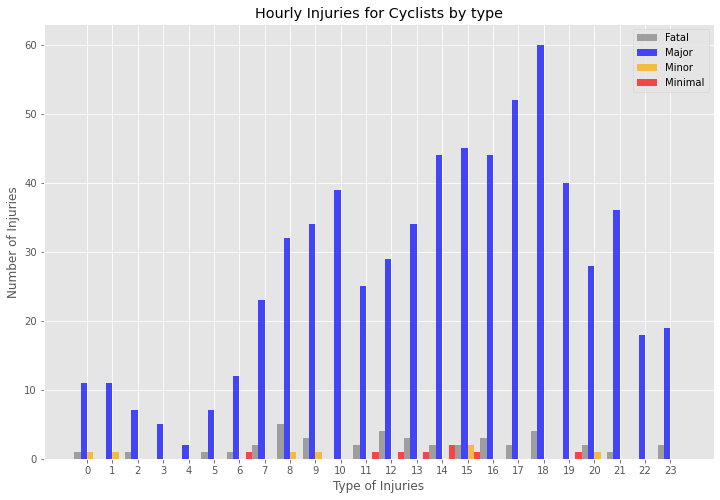

In [35]:
positions = list(range(len(cyclist_total_injuries_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, cyclist_total_injuries_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], cyclist_total_injuries_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], cyclist_total_injuries_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], cyclist_total_injuries_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for Cyclists by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = cyclist_total_injuries_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [36]:
pedestrian_injuries = file_content[(file_content['INVTYPE']=='Pedestrian')]

In [37]:
pedestrian_injuries

,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,HOOD_ID,NEIGHBOURHOOD,ObjectId,month,Season,INJURY_Fatal_NUM,INJURY_Major_NUM,INJURY_Minor_NUM,INJURY_Minimal_NUM,day_ofweek
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387731,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,88,High Park North (88),2,3,1,1,0,0,0,5
3387794,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,138,Eglinton East (138),6,3,1,0,0,1,0,6
3387795,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,138,Eglinton East (138),7,3,1,1,0,0,0,6
3388372,-8.841082e+06,5.411337e+06,892913,2006-03-12 19:03:00,2006,2006/03/12,19:03,19,OSSINGTON AVE,DUNDAS ST W,...,81,Trinity-Bellwoods (81),9,3,1,0,1,0,0,6
3389259,-8.855097e+06,5.418678e+06,893251,2006-03-15 15:35:00,2006,2006/03/15,15:35,15,ISLINGTON AVE,DIXON RD,...,6,Kingsview Village-The Westway (6),11,3,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81431952,-8.833869e+06,5.411272e+06,1521326,2020-08-14 04:45:00,2020,2020/08/14,4:45,4,LAKE SHORE BLVD E,CHERRY ST,...,77,Waterfront Communities-The Island (77),16818,8,2,1,0,0,0,4
81431949,-8.846033e+06,5.420112e+06,1522941,2020-08-14 11:05:00,2020,2020/08/14,11:05,11,CALEDONIA RD,GLENGROVE AVE,...,31,Yorkdale-Glen Park (31),16820,8,2,1,0,0,0,4
81431951,-8.846033e+06,5.420112e+06,1522941,2020-08-14 11:05:00,2020,2020/08/14,11:05,11,CALEDONIA RD,GLENGROVE AVE,...,31,Yorkdale-Glen Park (31),16822,8,2,0,0,1,0,4


In [38]:
ped_minmal = pedestrian_injuries.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
ped_minor = pedestrian_injuries.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
ped_major = pedestrian_injuries.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
ped_fatal = pedestrian_injuries.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [39]:
pedestrian_total_injuries = pd.concat([ped_fatal,ped_major,ped_minmal,ped_minor],axis=1)

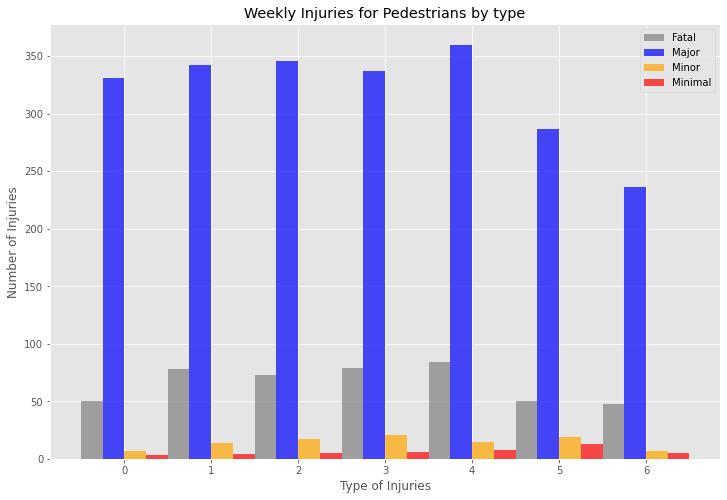

In [40]:
positions = list(range(len(pedestrian_total_injuries.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, pedestrian_total_injuries['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], pedestrian_total_injuries['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], pedestrian_total_injuries['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], pedestrian_total_injuries['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Pedestrians by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = pedestrian_total_injuries.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [41]:
ped_minmal_hr = pedestrian_injuries.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
ped_minor_hr = pedestrian_injuries.groupby('HOUR')['INJURY_Minor_NUM'].sum()
ped_major_hr = pedestrian_injuries.groupby('HOUR')['INJURY_Major_NUM'].sum()
ped_fatal_hr = pedestrian_injuries.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [42]:
pedestrian_total_injuries_hr = pd.concat([ped_fatal_hr,ped_major_hr,ped_minmal_hr,ped_minor_hr],axis=1)

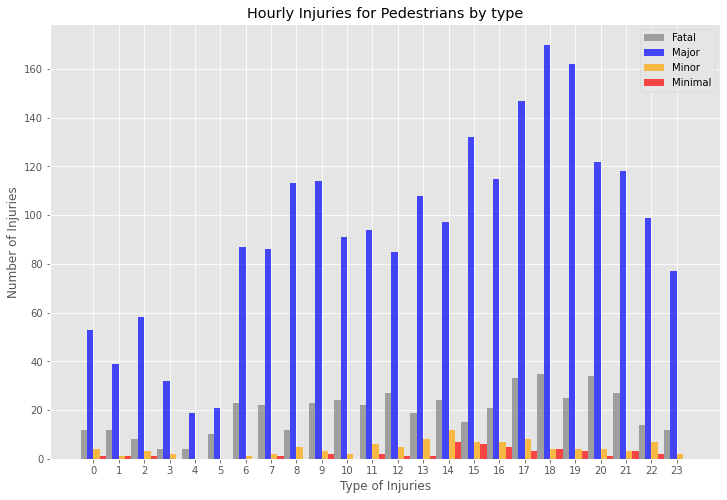

In [43]:
positions = list(range(len(pedestrian_total_injuries_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, pedestrian_total_injuries_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], pedestrian_total_injuries_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], pedestrian_total_injuries_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], pedestrian_total_injuries_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for Pedestrians by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = pedestrian_total_injuries_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [44]:
auto_injuries_driver = file_content[(file_content['INVTYPE']=='Driver')]
auto_injuries_passenger = file_content[(file_content['INVTYPE']=='Passenger')]

In [45]:
auto_minmal_dr = auto_injuries_driver.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
auto_minor_dr = auto_injuries_driver.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
auto_major_dr = auto_injuries_driver.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
auto_fatal_dr = auto_injuries_driver.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [46]:
auto_total_injuries_dr = pd.concat([auto_minmal_dr,auto_minor_dr,auto_major_dr,auto_fatal_dr],axis=1)

In [47]:
auto_total_injuries_dr = auto_total_injuries_dr.reset_index()

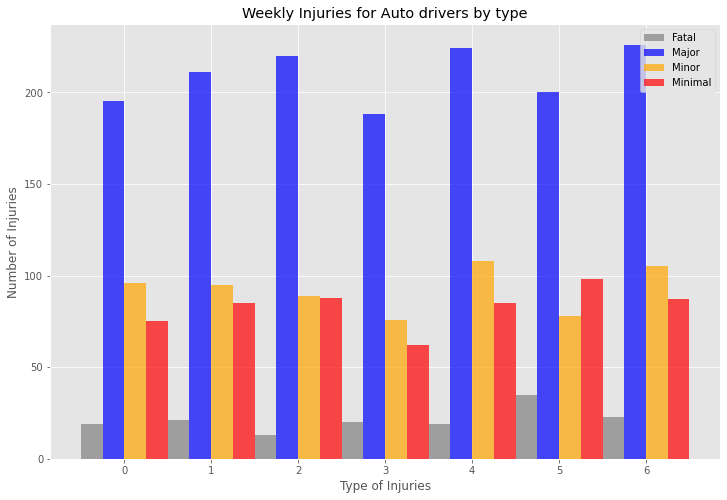

In [48]:
positions = list(range(len(auto_total_injuries_dr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, auto_total_injuries_dr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], auto_total_injuries_dr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], auto_total_injuries_dr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], auto_total_injuries_dr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Auto drivers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = auto_total_injuries_dr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [49]:
auto_minmal_pa = auto_injuries_passenger.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
auto_minor_pa = auto_injuries_passenger.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
auto_major_pa = auto_injuries_passenger.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
auto_fatal_pa = auto_injuries_passenger.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [50]:
auto_total_injuries_pa = pd.concat([auto_minmal_pa,auto_minor_pa,auto_major_pa,auto_fatal_pa],axis=1)

In [51]:
auto_total_injuries_pa = auto_total_injuries_pa.reset_index()

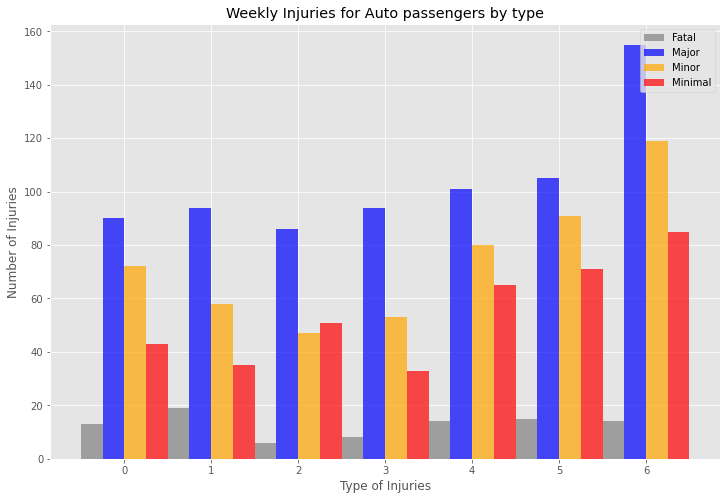

In [52]:
positions = list(range(len(auto_total_injuries_pa.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, auto_total_injuries_pa['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], auto_total_injuries_pa['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], auto_total_injuries_pa['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], auto_total_injuries_pa['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Auto passengers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = auto_total_injuries_pa.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [53]:
moto_injuries_driver = file_content[(file_content['INVTYPE']=='Motorcycle Driver')]
moto_injuries_passenger = file_content[(file_content['INVTYPE']=='Motorcycle Passenger')]

In [54]:
moto_minmal_dr = moto_injuries_driver.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
moto_minor_dr = moto_injuries_driver.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
moto_major_dr = moto_injuries_driver.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
moto_fatal_dr = moto_injuries_driver.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [55]:
moto_minmal_pa = moto_injuries_passenger.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
moto_minor_pa = moto_injuries_passenger.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
moto_major_pa = moto_injuries_passenger.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
moto_fatal_pa = moto_injuries_passenger.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [56]:
moto_total_injuries_dr = pd.concat([moto_minmal_dr,moto_minor_dr,moto_major_dr,moto_fatal_dr],axis=1)

In [57]:
moto_total_injuries_dr = moto_total_injuries_dr.reset_index()

In [58]:
moto_total_injuries_pa = pd.concat([moto_minmal_pa,moto_minor_pa,moto_major_pa,moto_fatal_pa],axis=1)

In [59]:
moto_total_injuries_pa = moto_total_injuries_pa.reset_index()

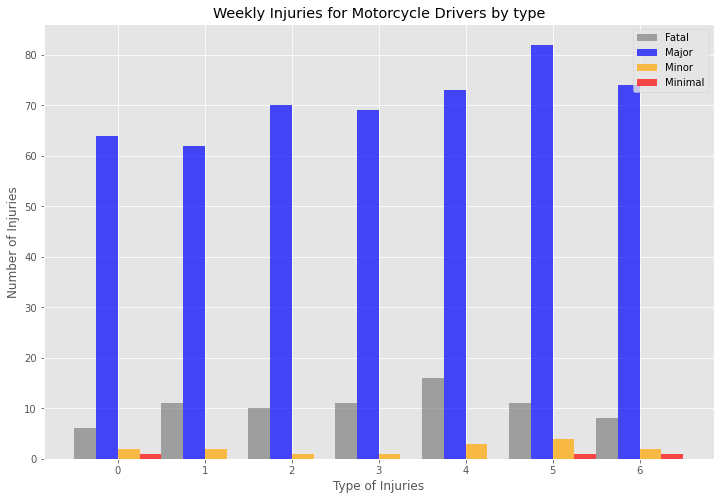

In [60]:
positions = list(range(len(moto_total_injuries_dr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, moto_total_injuries_dr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], moto_total_injuries_dr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], moto_total_injuries_dr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], moto_total_injuries_dr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Motorcycle Drivers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = moto_total_injuries_dr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

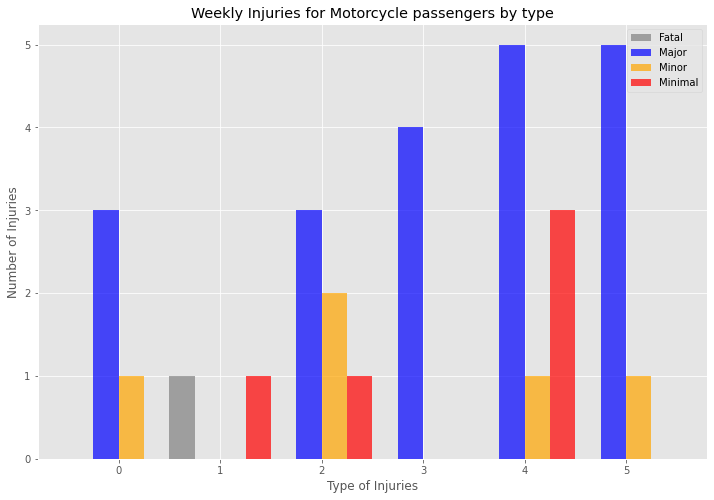

In [61]:
positions = list(range(len(moto_total_injuries_pa.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, moto_total_injuries_pa['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], moto_total_injuries_pa['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], moto_total_injuries_pa['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], moto_total_injuries_pa['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Motorcycle passengers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = moto_total_injuries_pa.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [62]:
cyc_minimal = cyclist_injuries.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
cyc_minor = cyclist_injuries.groupby('YEAR')['INJURY_Minor_NUM'].sum()
cyc_major = cyclist_injuries.groupby('YEAR')['INJURY_Major_NUM'].sum()
cyc_fatal = cyclist_injuries.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [64]:
cyc_yearly = pd.concat([cyc_minimal,cyc_minor,cyc_major,cyc_fatal],axis=1)

In [65]:
cyc_yearly

,INJURY_Minimal_NUM,INJURY_Minor_NUM,INJURY_Major_NUM,INJURY_Fatal_NUM
YEAR,,,,
2006,1,0,48,3
2007,0,1,36,3
2008,0,0,38,2
2009,2,0,38,1
2010,0,0,38,2
2011,1,0,49,2
2012,1,2,65,3
2013,0,1,60,4
2014,0,0,42,3


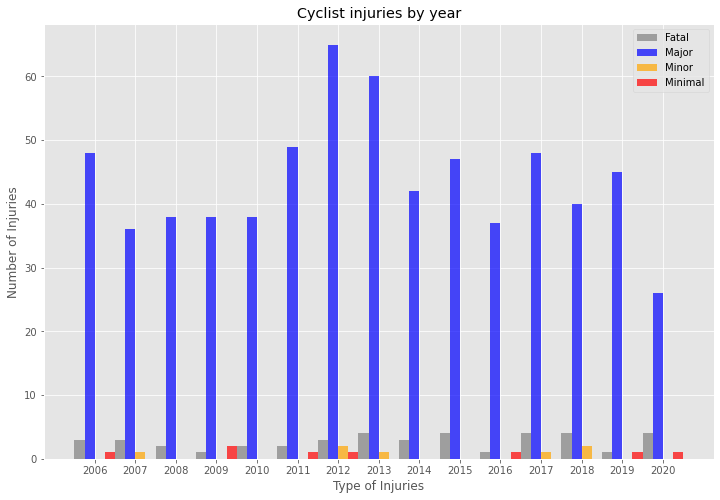

In [66]:
positions = list(range(len(cyc_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, cyc_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], cyc_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], cyc_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], cyc_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Cyclist injuries by year',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = cyc_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [67]:
ped_minmal_yr = pedestrian_injuries.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
ped_minor_yr = pedestrian_injuries.groupby('YEAR')['INJURY_Minor_NUM'].sum()
ped_major_yr = pedestrian_injuries.groupby('YEAR')['INJURY_Major_NUM'].sum()
ped_fatal_yr = pedestrian_injuries.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [68]:
ped_yearly = pd.concat([ped_minmal_yr,ped_minor_yr,ped_major_yr,ped_fatal_yr],axis=1)

In [69]:
ped_yearly

,INJURY_Minimal_NUM,INJURY_Minor_NUM,INJURY_Major_NUM,INJURY_Fatal_NUM
YEAR,,,,
2006,2,8,184,30
2007,6,10,162,22
2008,2,5,157,27
2009,4,3,165,31
2010,0,10,167,20
2011,1,6,167,18
2012,2,6,173,24
2013,5,13,165,40
2014,4,2,114,31


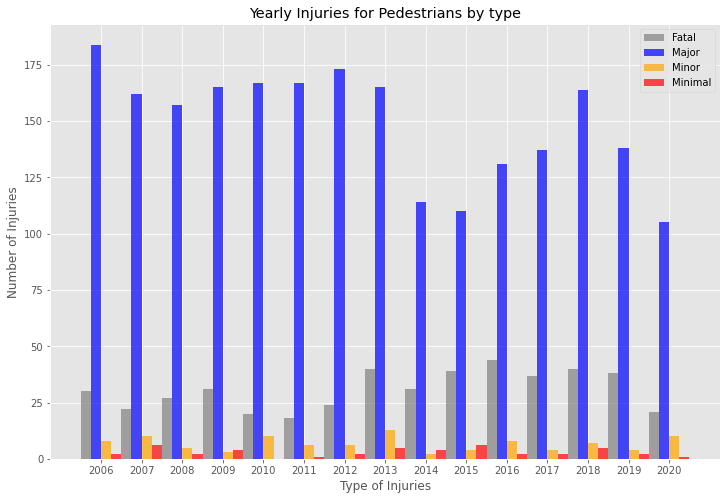

In [70]:
positions = list(range(len(ped_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, ped_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], ped_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], ped_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], ped_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Pedestrians by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = ped_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [71]:
auto_minmal_dryr = auto_injuries_driver.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
auto_minor_dryr = auto_injuries_driver.groupby('YEAR')['INJURY_Minor_NUM'].sum()
auto_major_dryr = auto_injuries_driver.groupby('YEAR')['INJURY_Major_NUM'].sum()
auto_fatal_dryr = auto_injuries_driver.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [72]:
auto_driver_yearly = pd.concat([auto_minmal_dryr,auto_minor_dryr,auto_major_dryr,auto_fatal_dryr],axis=1)

In [73]:
auto_driver_yearly

,INJURY_Minimal_NUM,INJURY_Minor_NUM,INJURY_Major_NUM,INJURY_Fatal_NUM
YEAR,,,,
2006,49,59,145,9
2007,55,57,157,14
2008,41,62,124,13
2009,45,49,131,6
2010,43,45,98,11
2011,35,40,94,10
2012,43,49,101,7
2013,31,46,86,7
2014,36,29,91,9


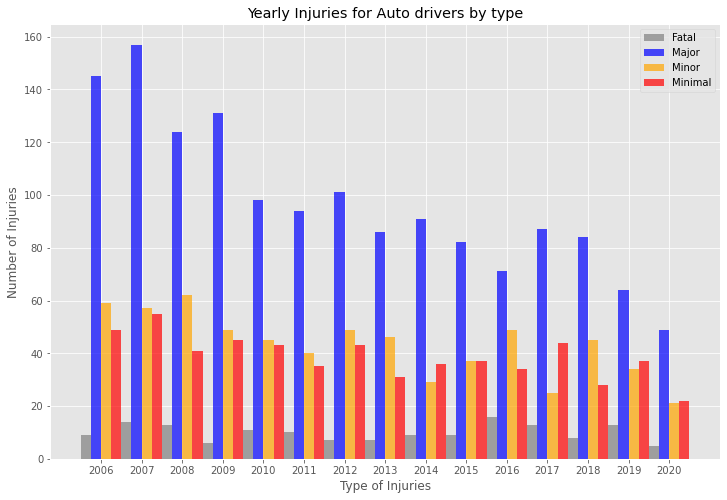

In [74]:
positions = list(range(len(auto_driver_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, auto_driver_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], auto_driver_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], auto_driver_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], auto_driver_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Auto drivers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = auto_driver_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [75]:
auto_minmal_payr = auto_injuries_passenger.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
auto_minor_payr = auto_injuries_passenger.groupby('YEAR')['INJURY_Minor_NUM'].sum()
auto_major_payr = auto_injuries_passenger.groupby('YEAR')['INJURY_Major_NUM'].sum()
auto_fatal_payr = auto_injuries_passenger.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [76]:
auto_total_injuries_payr = pd.concat([auto_minmal_payr,auto_minor_payr,auto_major_payr,auto_fatal_payr],axis=1)

In [77]:
auto_total_injuries_payr

,INJURY_Minimal_NUM,INJURY_Minor_NUM,INJURY_Major_NUM,INJURY_Fatal_NUM
YEAR,,,,
2006,30,53,82,9
2007,40,52,61,8
2008,27,33,47,7
2009,29,37,58,9
2010,28,28,57,8
2011,23,33,46,2
2012,29,34,47,4
2013,20,46,45,5
2014,27,31,45,5


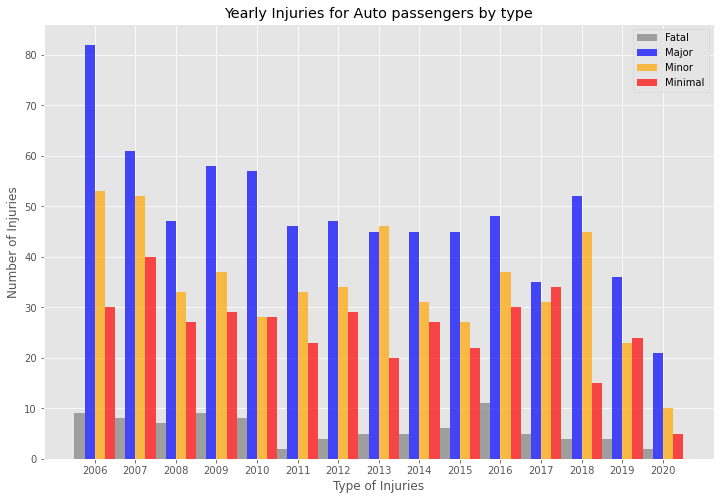

In [78]:
positions = list(range(len(auto_total_injuries_payr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, auto_total_injuries_payr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], auto_total_injuries_payr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], auto_total_injuries_payr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], auto_total_injuries_payr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Auto passengers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = auto_total_injuries_payr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [79]:
moto_minmal_dryr = moto_injuries_driver.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
moto_minor_dryr = moto_injuries_driver.groupby('YEAR')['INJURY_Minor_NUM'].sum()
moto_major_dryr = moto_injuries_driver.groupby('YEAR')['INJURY_Major_NUM'].sum()
moto_fatal_dryr = moto_injuries_driver.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [80]:
moto_minmal_payr = moto_injuries_passenger.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
moto_minor_payr = moto_injuries_passenger.groupby('YEAR')['INJURY_Minor_NUM'].sum()
moto_major_payr = moto_injuries_passenger.groupby('YEAR')['INJURY_Major_NUM'].sum()
moto_fatal_payr = moto_injuries_passenger.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [81]:
moto_total_injuries_dryr = pd.concat([moto_minmal_dryr,moto_minor_dryr,moto_major_dryr,moto_fatal_dryr],axis=1)

In [82]:
moto_total_injuries_payr = pd.concat([moto_minmal_payr,moto_minor_payr,moto_major_payr,moto_fatal_payr],axis=1)

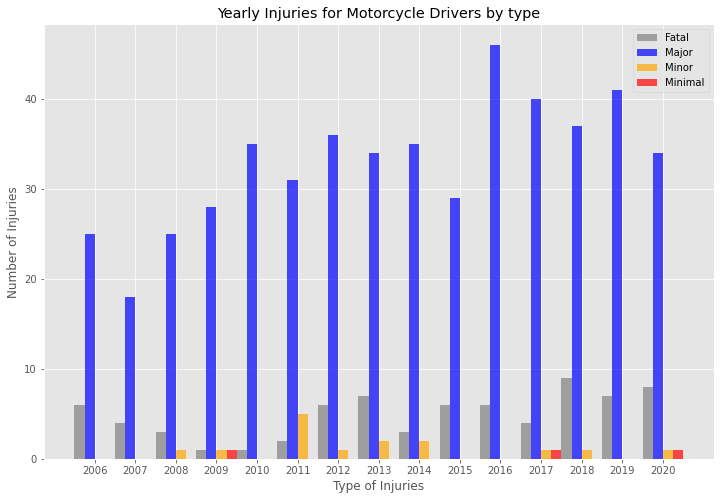

In [83]:
positions = list(range(len(moto_total_injuries_dryr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, moto_total_injuries_dryr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], moto_total_injuries_dryr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], moto_total_injuries_dryr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], moto_total_injuries_dryr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Motorcycle Drivers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = moto_total_injuries_dryr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

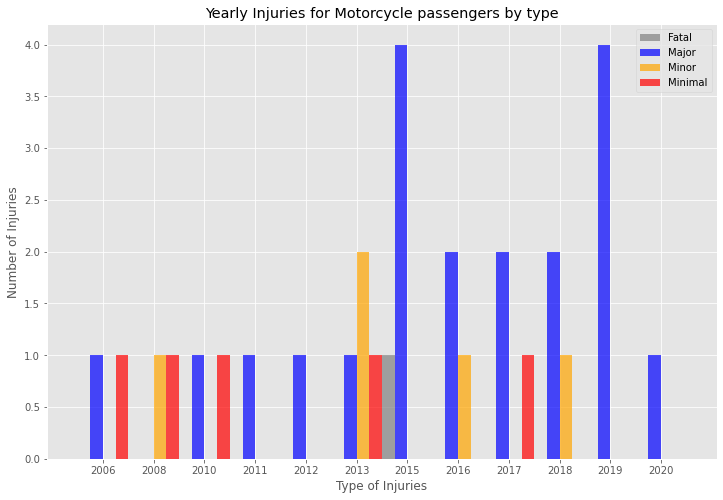

In [84]:
positions = list(range(len(moto_total_injuries_payr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, moto_total_injuries_payr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], moto_total_injuries_payr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], moto_total_injuries_payr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], moto_total_injuries_payr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Motorcycle passengers by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = moto_total_injuries_payr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [85]:
dict_vehclass = {'Automobile, Station Wagon':'Personal Vehicle',
                 'Other':'Misc',
                 'Motorcycle':'Motorcycle',
                 'Bicycle': 'Bicycle',
                 '<Null>':'None',
                 'Municipal Transit Bus (TTC)':'Public Transit',
                 'Truck - Open':'Large Trucks',
                 'Taxi':'Personal Vehicle',
                 'Passenger Van':'Personal Vehicle',
                 'Delivery Van':'Large Trucks',
                 'Moped':'Motorcycle',
                 'Pick Up Truck':'Personal Vehicle',
                 'Police Vehicle':'Emergency Vehicles',
                 'Truck-Tractor':'Large Trucks',
                 'Truck - Closed (Blazer, etc)':'Personal Vehicle',
                 'Street Car':'Public Transit',
                 'Bus (Other) (Go Bus, Gray Coach)':'Public Transit',
                 'Truck - Dump':'Large Trucks',
                 'Construction Equipment':'Large Trucks',
                 'Intercity Bus':'Public Transit',
                 'Truck (other)':'Large Trucks',
                 'Truck - Tank':'Large Trucks',
                 'Other Emergency Vehicle':'Emergency Vehicles',
                 'School Bus':'Public Transit',
                 'Tow Truck':'Large Trucks',
                 'Off Road - 2 Wheels':'Motorcycle',
                 'Fire Vehicle':'Emergency Vehicles',
                 'Truck - Car Carrier':'Large Trucks'}

In [86]:
file_content['VEHCLASS'] = file_content['VEHTYPE'].map(dict_vehclass)

In [87]:
file_content

,X,Y,ACCNUM,DATE_TIME,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,NEIGHBOURHOOD,ObjectId,month,Season,INJURY_Fatal_NUM,INJURY_Major_NUM,INJURY_Minor_NUM,INJURY_Minimal_NUM,day_ofweek,VEHCLASS
INDEX_,,,,,,,,,,,,,,,,,,,,,
3387730,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,High Park North (88),1,3,1,0,0,0,0,5,Personal Vehicle
3387731,-8.844611e+06,5.412414e+06,892658,2006-03-11 08:52:00,2006,2006/03/11,8:52,8,BLOOR ST W,DUNDAS ST W,...,High Park North (88),2,3,1,1,0,0,0,5,Misc
3388101,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Rouge (131),3,3,1,1,0,0,0,5,Motorcycle
3388102,-8.816480e+06,5.434843e+06,892810,2006-03-11 09:15:00,2006,2006/03/11,9:15,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,Rouge (131),4,3,1,0,0,0,0,5,Personal Vehicle
3387793,-8.822759e+06,5.424516e+06,892682,2006-03-12 02:40:00,2006,2006/03/12,2:40,2,EGLINTON AVE E,COMMONWEALTH AVE,...,Eglinton East (138),5,3,1,0,0,0,0,6,Personal Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81509784,-8.820837e+06,5.421411e+06,1636966,2020-08-30 13:40:00,2020,2020/08/30,13:40,13,BRIMLEY RD,BARKDENE HILLS,...,Cliffcrest (123),16856,8,2,0,1,0,0,6,Bicycle
81505452,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,Eglinton East (138),16857,9,3,0,0,0,0,1,Personal Vehicle
81505453,-8.820068e+06,5.425334e+06,1650701,2020-09-01 12:05:00,2020,2020/09/01,12:05,12,EGLINTON AVE E,BELLAMY RD N,...,Eglinton East (138),16858,9,3,0,0,1,0,1,Personal Vehicle


In [88]:
file_content['VEHCLASS'].isnull().all()

False

In [89]:
file_content['VEHCLASS'].unique()

array(['Personal Vehicle', 'Misc', 'Motorcycle', 'Bicycle', 'None',
       'Public Transit', 'Large Trucks', 'Emergency Vehicles'],
      dtype=object)

In [90]:
personal_vehicle = file_content[(file_content['VEHCLASS']=='Personal Vehicle')]

In [91]:
motorcycle_vehicle = file_content[(file_content['VEHCLASS']=='Motorcycle')]
bicycle_vehicle = file_content[(file_content['VEHCLASS']=='Bicycle')]
public_transit_vehicle = file_content[(file_content['VEHCLASS']=='Public Transit')]
large_trucks_vehicle = file_content[(file_content['VEHCLASS']=='Large Trucks')]
emergency_vehicle = file_content[(file_content['VEHCLASS']=='Emergency Vehicles')]

In [92]:
personal_vehicle_minimal_yr = personal_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
personal_vehicle_minor_yr= personal_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
personal_vehicle_major_yr = personal_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
personal_vehicle_fatal_yr = personal_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [93]:
personal_vehicle_yearly = pd.concat([personal_vehicle_minimal_yr,personal_vehicle_minor_yr,personal_vehicle_major_yr,personal_vehicle_fatal_yr],axis=1)

In [94]:
personal_vehicle_minimal_wk = personal_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
personal_vehicle_minor_wk = personal_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
personal_vehicle_major_wk = personal_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
personal_vehicle_fatal_wk = personal_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [95]:
personal_vehicle_weekly = pd.concat([personal_vehicle_minimal_wk,personal_vehicle_minor_wk,personal_vehicle_major_wk,personal_vehicle_fatal_wk],axis=1)

In [96]:
personal_vehicle_minimal_ssn = personal_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
personal_vehicle_minor_ssn= personal_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
personal_vehicle_major_ssn = personal_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
personal_vehicle_fatal_ssn = personal_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [97]:
personal_vehicle_season = pd.concat([personal_vehicle_minimal_ssn,personal_vehicle_minor_ssn,personal_vehicle_major_ssn,personal_vehicle_fatal_ssn],axis=1)

In [98]:
personal_vehicle_minimal_hr = personal_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
personal_vehicle_minor_hr= personal_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
personal_vehicle_major_hr = personal_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
personal_vehicle_fatal_hr = personal_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [99]:
personal_vehicle_hr = pd.concat([personal_vehicle_minimal_hr,personal_vehicle_minor_hr,personal_vehicle_major_hr,personal_vehicle_fatal_hr],axis=1)

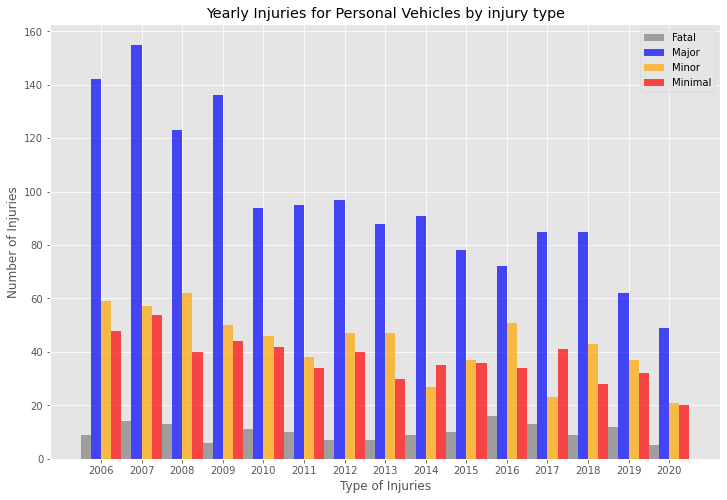

In [100]:
positions = list(range(len(personal_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, personal_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], personal_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], personal_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], personal_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Personal Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = personal_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

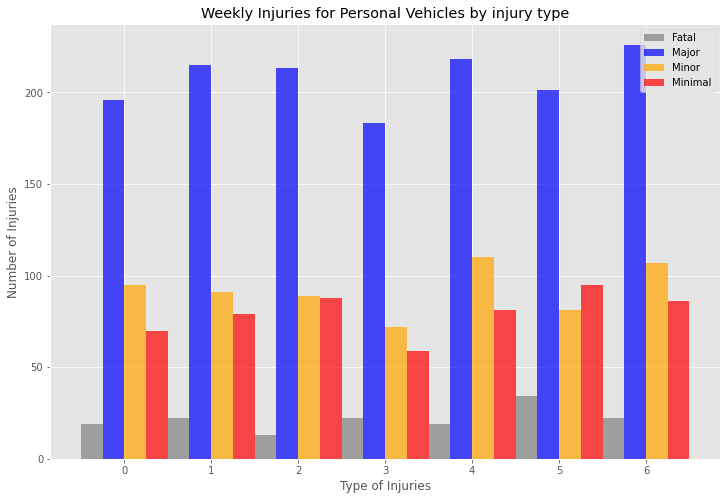

In [101]:
positions = list(range(len(personal_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, personal_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], personal_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], personal_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], personal_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Personal Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = personal_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

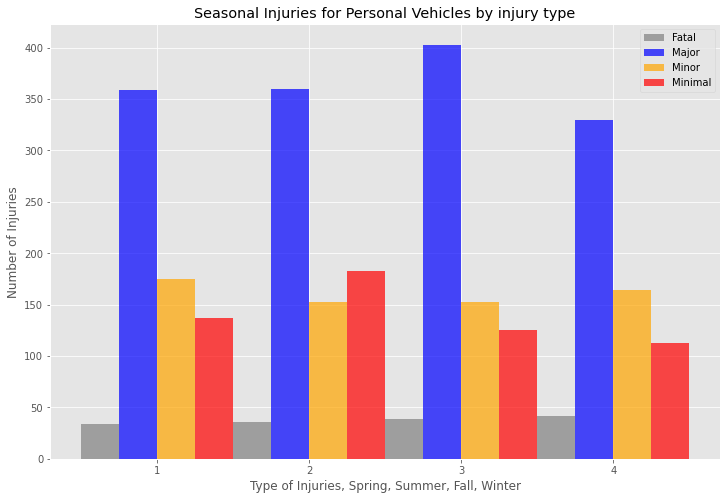

In [102]:
positions = list(range(len(personal_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, personal_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], personal_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], personal_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], personal_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for Personal Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = personal_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

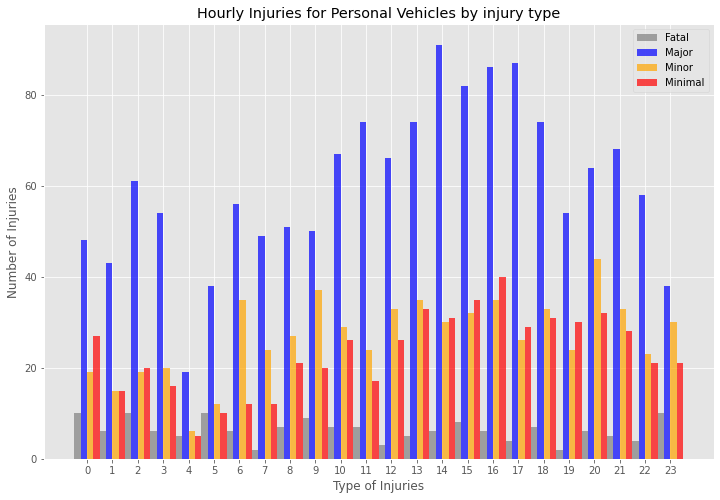

In [103]:
positions = list(range(len(personal_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, personal_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], personal_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], personal_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], personal_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for Personal Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = personal_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [104]:
motorcycle_vehicle_minimal_yr = motorcycle_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
motorcycle_vehicle_minor_yr= motorcycle_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
motorcycle_vehicle_major_yr = motorcycle_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
motorcycle_vehicle_fatal_yr = motorcycle_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [105]:
motorcycle_vehicle_yearly = pd.concat([motorcycle_vehicle_minimal_yr,motorcycle_vehicle_minor_yr,motorcycle_vehicle_major_yr,motorcycle_vehicle_fatal_yr],axis=1)

In [106]:
motorcycle_vehicle_minimal_wk = motorcycle_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
motorcycle_vehicle_minor_wk = motorcycle_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
motorcycle_vehicle_major_wk = motorcycle_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
motorcycle_vehicle_fatal_wk = motorcycle_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [107]:
motorcycle_vehicle_weekly = pd.concat([motorcycle_vehicle_minimal_wk,motorcycle_vehicle_minor_wk,motorcycle_vehicle_major_wk,motorcycle_vehicle_fatal_wk],axis=1)

In [108]:
motorcycle_vehicle_minimal_ssn = motorcycle_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
motorcycle_vehicle_minor_ssn= motorcycle_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
motorcycle_vehicle_major_ssn = motorcycle_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
motorcycle_vehicle_fatal_ssn = motorcycle_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [109]:
motorcycle_vehicle_season = pd.concat([motorcycle_vehicle_minimal_ssn,motorcycle_vehicle_minor_ssn,motorcycle_vehicle_major_ssn,motorcycle_vehicle_fatal_ssn],axis=1)

In [110]:
motorcycle_vehicle_minimal_hr = motorcycle_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
motorcycle_vehicle_minor_hr= motorcycle_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
motorcycle_vehicle_major_hr = motorcycle_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
motorcycle_vehicle_fatal_hr = motorcycle_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [111]:
motorcycle_vehicle_hr = pd.concat([motorcycle_vehicle_minimal_hr,motorcycle_vehicle_minor_hr,motorcycle_vehicle_major_hr,motorcycle_vehicle_fatal_hr],axis=1)

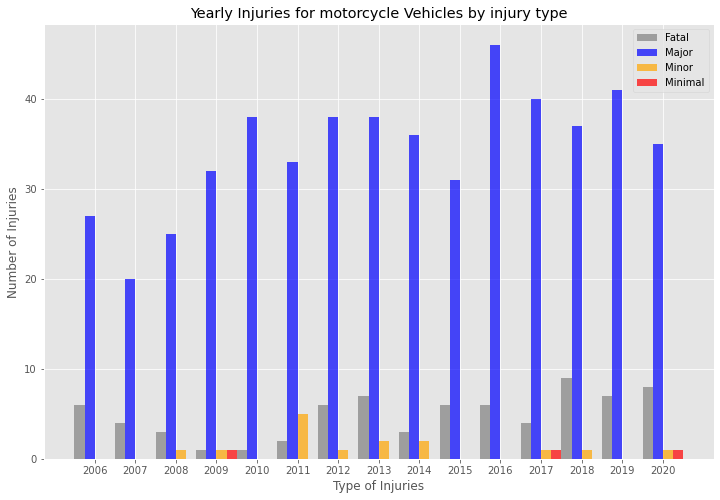

In [112]:
positions = list(range(len(motorcycle_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, motorcycle_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], motorcycle_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], motorcycle_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], motorcycle_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for motorcycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = motorcycle_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

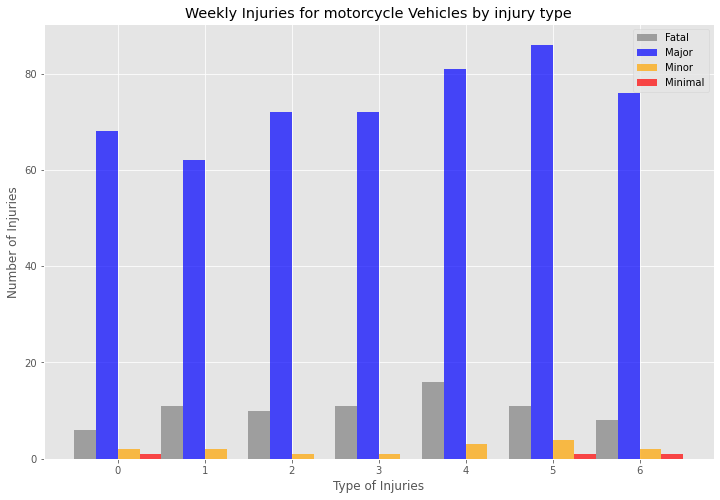

In [113]:
positions = list(range(len(motorcycle_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, motorcycle_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], motorcycle_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], motorcycle_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], motorcycle_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for motorcycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = motorcycle_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

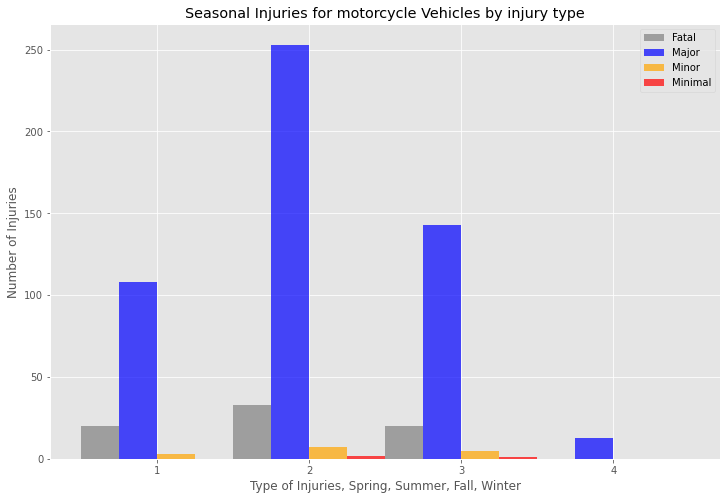

In [114]:
positions = list(range(len(motorcycle_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, motorcycle_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], motorcycle_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], motorcycle_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], motorcycle_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for motorcycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = motorcycle_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

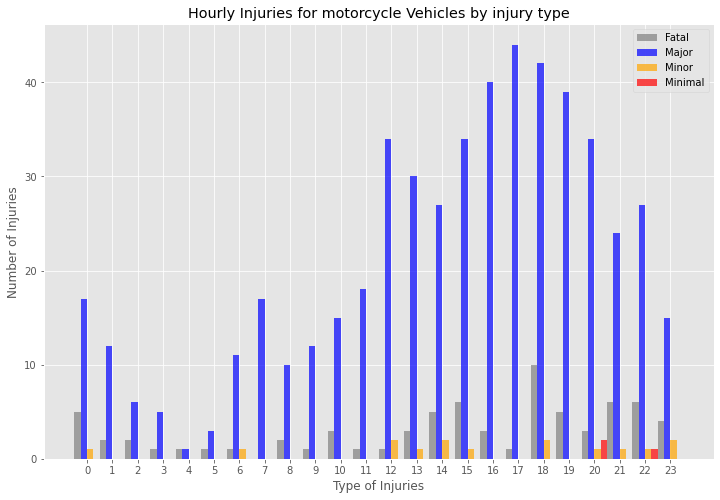

In [115]:
positions = list(range(len(motorcycle_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, motorcycle_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], motorcycle_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], motorcycle_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], motorcycle_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for motorcycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = motorcycle_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [116]:
bicycle_vehicle_minimal_yr = bicycle_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
bicycle_vehicle_minor_yr= bicycle_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
bicycle_vehicle_major_yr = bicycle_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
bicycle_vehicle_fatal_yr = bicycle_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [117]:
bicycle_vehicle_yearly = pd.concat([bicycle_vehicle_minimal_yr,bicycle_vehicle_minor_yr,bicycle_vehicle_major_yr,bicycle_vehicle_fatal_yr],axis=1)

In [118]:
bicycle_vehicle_minimal_wk = bicycle_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
bicycle_vehicle_minor_wk = bicycle_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
bicycle_vehicle_major_wk = bicycle_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
bicycle_vehicle_fatal_wk = bicycle_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [119]:
bicycle_vehicle_weekly = pd.concat([bicycle_vehicle_minimal_wk,bicycle_vehicle_minor_wk,bicycle_vehicle_major_wk,bicycle_vehicle_fatal_wk],axis=1)

In [120]:
bicycle_vehicle_minimal_ssn = bicycle_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
bicycle_vehicle_minor_ssn= bicycle_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
bicycle_vehicle_major_ssn = bicycle_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
bicycle_vehicle_fatal_ssn = bicycle_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [121]:
bicycle_vehicle_season = pd.concat([bicycle_vehicle_minimal_ssn,bicycle_vehicle_minor_ssn,bicycle_vehicle_major_ssn,bicycle_vehicle_fatal_ssn],axis=1)

In [122]:
bicycle_vehicle_minimal_hr = bicycle_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
bicycle_vehicle_minor_hr= bicycle_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
bicycle_vehicle_major_hr = bicycle_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
bicycle_vehicle_fatal_hr = bicycle_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [123]:
bicycle_vehicle_hr = pd.concat([bicycle_vehicle_minimal_hr,bicycle_vehicle_minor_hr,bicycle_vehicle_major_hr,bicycle_vehicle_fatal_hr],axis=1)

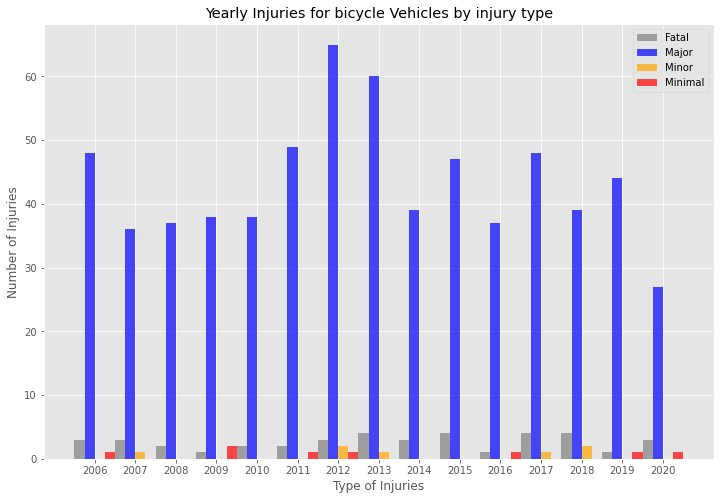

In [124]:
positions = list(range(len(bicycle_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, bicycle_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], bicycle_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], bicycle_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], bicycle_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for bicycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = bicycle_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

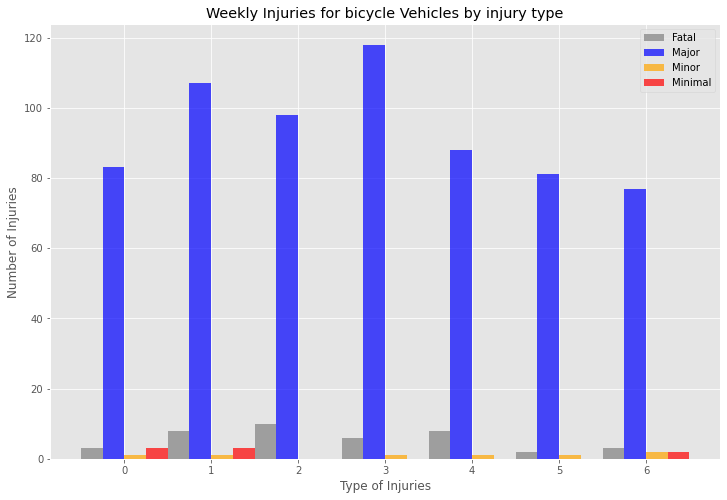

In [125]:
positions = list(range(len(bicycle_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, bicycle_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],bicycle_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], bicycle_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], bicycle_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for bicycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = bicycle_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

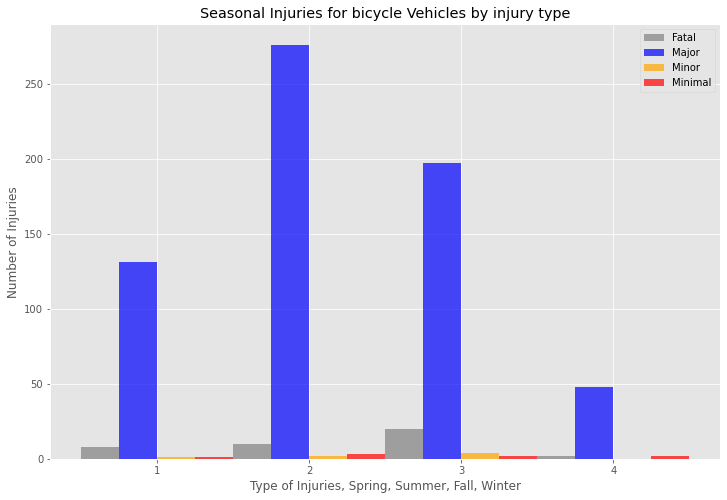

In [126]:
positions = list(range(len(bicycle_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, bicycle_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], bicycle_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], bicycle_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], bicycle_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for bicycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = bicycle_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

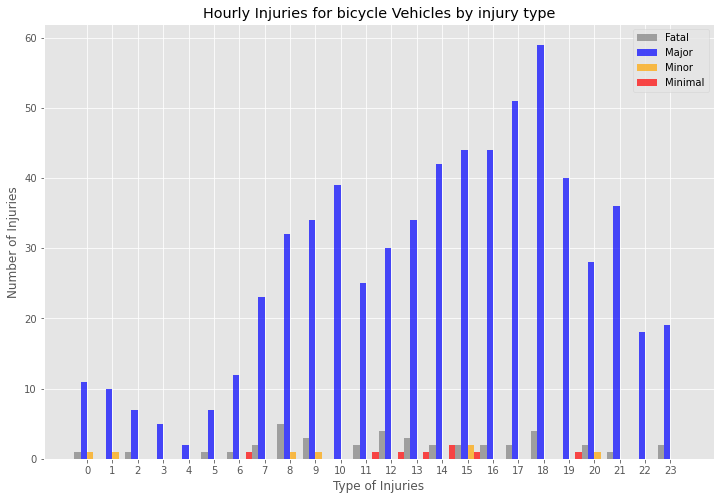

In [127]:
positions = list(range(len(bicycle_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, bicycle_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], bicycle_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], bicycle_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], bicycle_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for bicycle Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = bicycle_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [128]:
public_transit_vehicle_minimal_yr = public_transit_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
public_transit_vehicle_minor_yr= public_transit_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
public_transit_vehicle_major_yr = public_transit_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
public_transit_vehicle_fatal_yr = public_transit_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [129]:
public_transit_vehicle_yearly = pd.concat([public_transit_vehicle_minimal_yr,public_transit_vehicle_minor_yr,public_transit_vehicle_major_yr,public_transit_vehicle_fatal_yr],axis=1)

In [130]:
public_transit_vehicle_minimal_wk = public_transit_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
public_transit_vehicle_minor_wk = public_transit_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
public_transit_vehicle_major_wk = public_transit_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
public_transit_vehicle_fatal_wk = public_transit_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [131]:
public_transit_vehicle_weekly = pd.concat([public_transit_vehicle_minimal_wk,public_transit_vehicle_minor_wk,public_transit_vehicle_major_wk,public_transit_vehicle_fatal_wk],axis=1)

In [132]:
public_transit_vehicle_minimal_ssn = public_transit_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
public_transit_vehicle_minor_ssn= public_transit_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
public_transit_vehicle_major_ssn = public_transit_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
public_transit_vehicle_fatal_ssn = public_transit_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [133]:
public_transit_vehicle_season = pd.concat([public_transit_vehicle_minimal_ssn,public_transit_vehicle_minor_ssn,public_transit_vehicle_major_ssn,public_transit_vehicle_fatal_ssn],axis=1)

In [134]:
public_transit_vehicle_minimal_hr = public_transit_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
public_transit_vehicle_minor_hr= public_transit_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
public_transit_vehicle_major_hr = public_transit_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
public_transit_vehicle_fatal_hr = public_transit_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [135]:
public_transit_vehicle_hr = pd.concat([public_transit_vehicle_minimal_hr,public_transit_vehicle_minor_hr,public_transit_vehicle_major_hr,public_transit_vehicle_fatal_hr],axis=1)

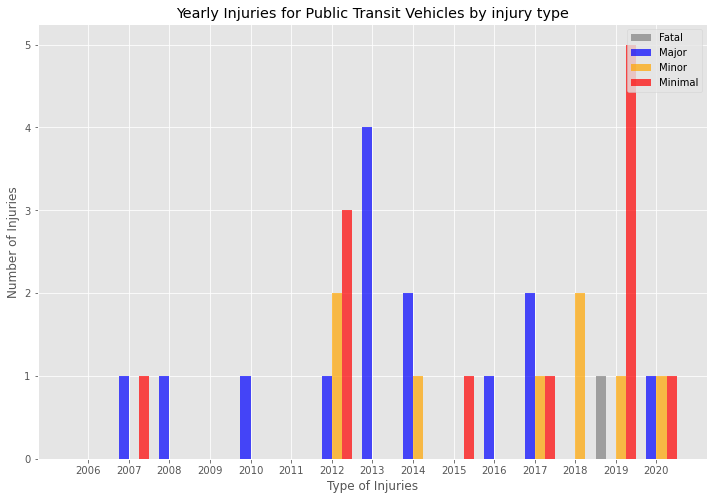

In [136]:
positions = list(range(len(public_transit_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, public_transit_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], public_transit_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], public_transit_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], public_transit_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Public Transit Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = public_transit_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

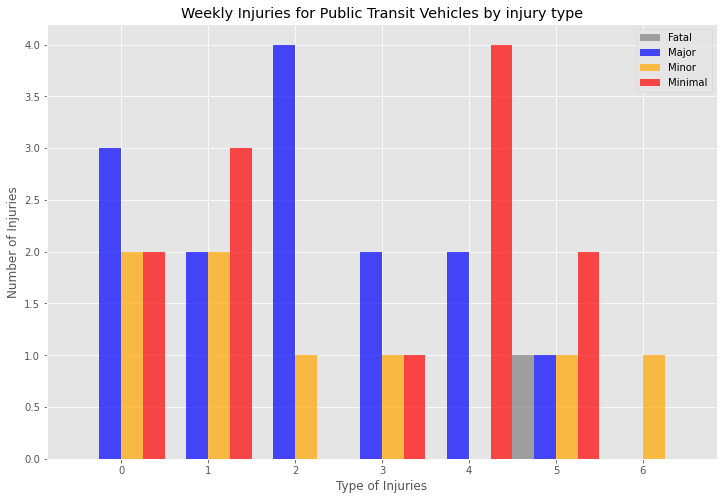

In [137]:
positions = list(range(len(public_transit_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, public_transit_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],public_transit_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], public_transit_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], public_transit_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Public Transit Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = public_transit_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

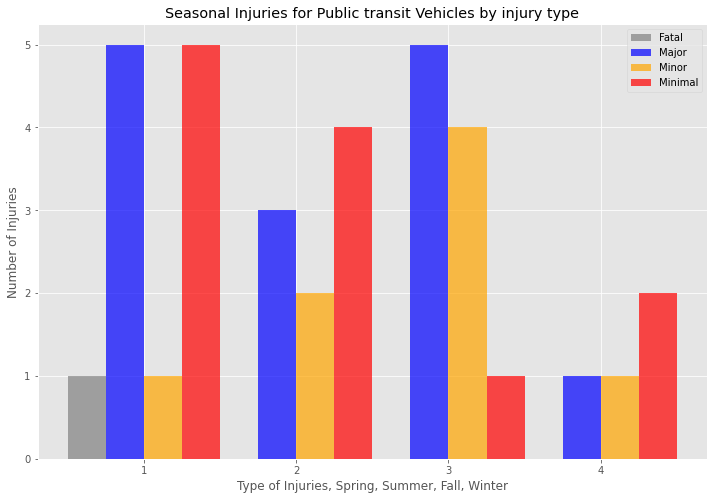

In [138]:
positions = list(range(len(public_transit_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, public_transit_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], public_transit_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], public_transit_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], public_transit_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for Public transit Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = public_transit_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

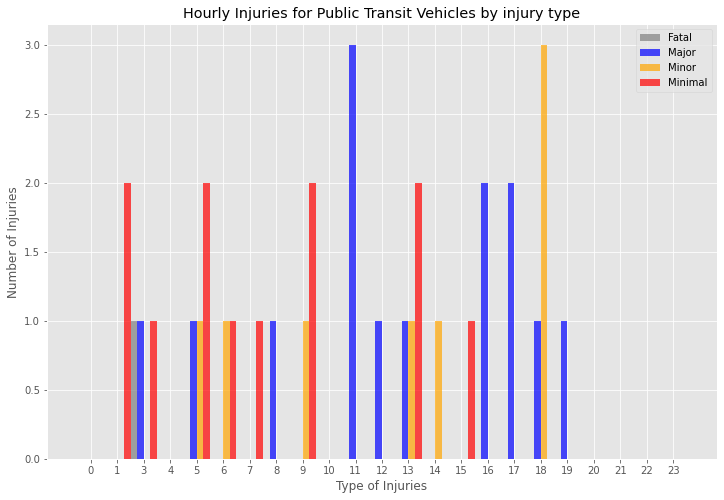

In [139]:
positions = list(range(len(public_transit_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, public_transit_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],public_transit_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], public_transit_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], public_transit_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for Public Transit Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = public_transit_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [140]:
large_trucks_vehicle_minimal_yr = large_trucks_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
large_trucks_vehicle_minor_yr= large_trucks_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
large_trucks_vehicle_major_yr = large_trucks_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
large_trucks_vehicle_fatal_yr = large_trucks_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [141]:
large_trucks_vehicle_yearly = pd.concat([large_trucks_vehicle_minimal_yr,large_trucks_vehicle_minor_yr,large_trucks_vehicle_major_yr,large_trucks_vehicle_fatal_yr],axis=1)

In [142]:
large_trucks_vehicle_minimal_wk = large_trucks_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
large_trucks_vehicle_minor_wk = large_trucks_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
large_trucks_vehicle_major_wk = large_trucks_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
large_trucks_vehicle_fatal_wk = large_trucks_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [143]:
large_trucks_vehicle_weekly = pd.concat([large_trucks_vehicle_minimal_wk,large_trucks_vehicle_minor_wk,large_trucks_vehicle_major_wk,large_trucks_vehicle_fatal_wk],axis=1)

In [144]:
large_trucks_vehicle_minimal_ssn = large_trucks_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
large_trucks_vehicle_minor_ssn= large_trucks_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
large_trucks_vehicle_major_ssn = large_trucks_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
large_trucks_vehicle_fatal_ssn = large_trucks_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [145]:
large_trucks_vehicle_season = pd.concat([large_trucks_vehicle_minimal_ssn,large_trucks_vehicle_minor_ssn,large_trucks_vehicle_major_ssn,large_trucks_vehicle_fatal_ssn],axis=1)

In [146]:
large_trucks_vehicle_minimal_hr = large_trucks_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
large_trucks_vehicle_minor_hr= large_trucks_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
large_trucks_vehicle_major_hr = large_trucks_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
large_trucks_vehicle_fatal_hr = large_trucks_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [147]:
large_trucks_vehicle_hr = pd.concat([large_trucks_vehicle_minimal_hr,large_trucks_vehicle_minor_hr,large_trucks_vehicle_major_hr,large_trucks_vehicle_fatal_hr],axis=1)

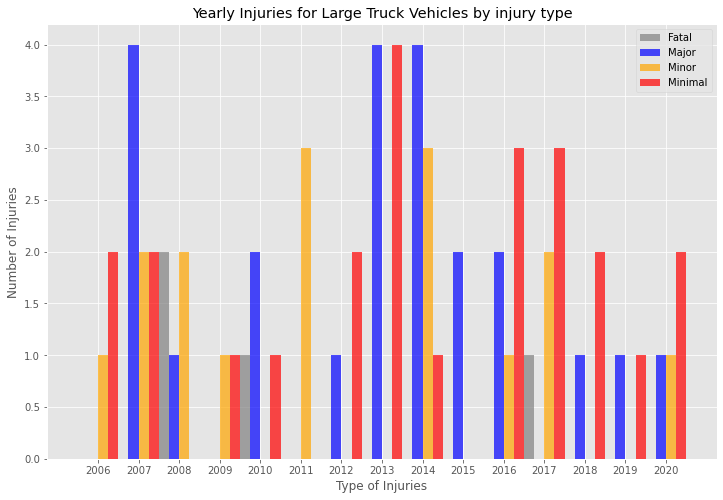

In [148]:
positions = list(range(len(large_trucks_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, large_trucks_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], large_trucks_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], large_trucks_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], large_trucks_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Large Truck Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = large_trucks_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

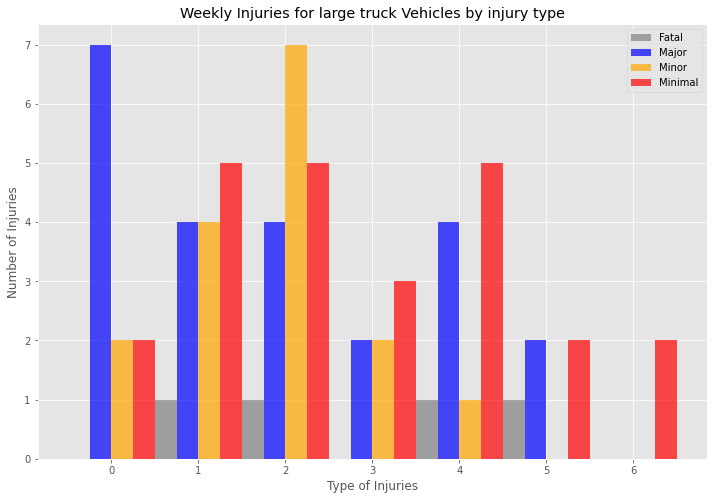

In [149]:
positions = list(range(len(large_trucks_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, large_trucks_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],large_trucks_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], large_trucks_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], large_trucks_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for large truck Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = large_trucks_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

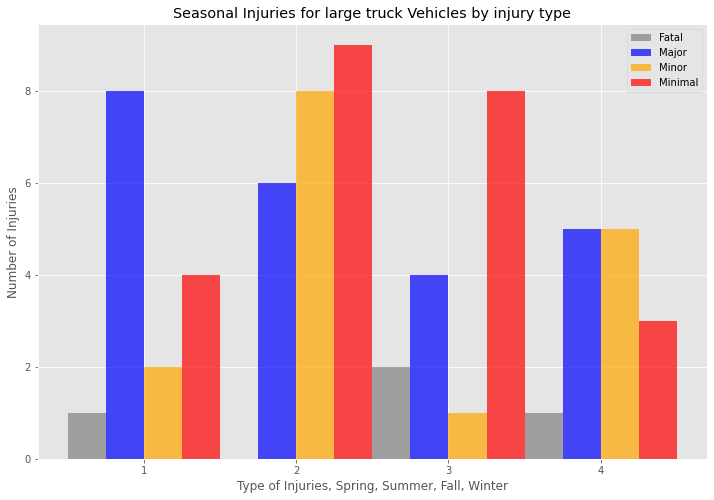

In [150]:
positions = list(range(len(large_trucks_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, large_trucks_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], large_trucks_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], large_trucks_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], large_trucks_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for large truck Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = large_trucks_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

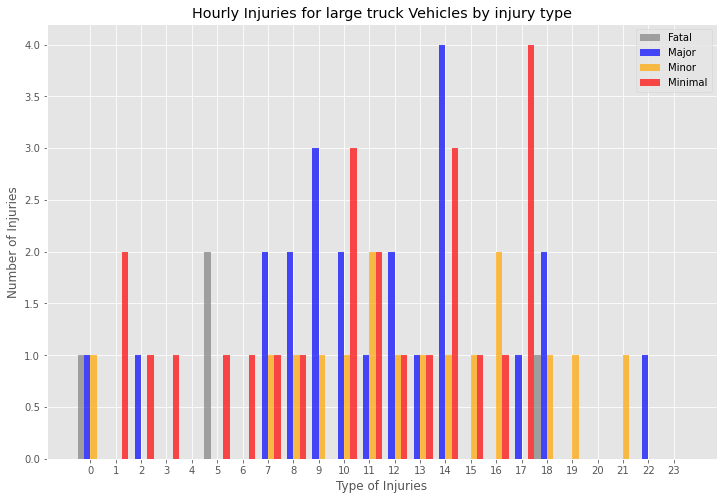

In [151]:
positions = list(range(len(large_trucks_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, large_trucks_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],large_trucks_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], large_trucks_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], large_trucks_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for large truck Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = large_trucks_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [152]:
emergency_vehicle_minimal_yr = emergency_vehicle.groupby('YEAR')['INJURY_Minimal_NUM'].sum()
emergency_vehicle_minor_yr= emergency_vehicle.groupby('YEAR')['INJURY_Minor_NUM'].sum()
emergency_vehicle_major_yr = emergency_vehicle.groupby('YEAR')['INJURY_Major_NUM'].sum()
emergency_vehicle_fatal_yr = emergency_vehicle.groupby('YEAR')['INJURY_Fatal_NUM'].sum()

In [153]:
emergency_vehicle_yearly = pd.concat([emergency_vehicle_minimal_yr,emergency_vehicle_minor_yr,emergency_vehicle_major_yr,emergency_vehicle_fatal_yr],axis=1)

In [154]:
emergency_vehicle_minimal_wk = emergency_vehicle.groupby('day_ofweek')['INJURY_Minimal_NUM'].sum()
emergency_vehicle_minor_wk = emergency_vehicle.groupby('day_ofweek')['INJURY_Minor_NUM'].sum()
emergency_vehicle_major_wk = emergency_vehicle.groupby('day_ofweek')['INJURY_Major_NUM'].sum()
emergency_vehicle_fatal_wk = emergency_vehicle.groupby('day_ofweek')['INJURY_Fatal_NUM'].sum()

In [155]:
emergency_vehicle_weekly = pd.concat([emergency_vehicle_minimal_wk,emergency_vehicle_minor_wk,emergency_vehicle_major_wk,emergency_vehicle_fatal_wk],axis=1)

In [156]:
emergency_vehicle_minimal_ssn = emergency_vehicle.groupby('Season')['INJURY_Minimal_NUM'].sum()
emergency_vehicle_minor_ssn= emergency_vehicle.groupby('Season')['INJURY_Minor_NUM'].sum()
emergency_vehicle_major_ssn = emergency_vehicle.groupby('Season')['INJURY_Major_NUM'].sum()
emergency_vehicle_fatal_ssn = emergency_vehicle.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [157]:
emergency_vehicle_season = pd.concat([emergency_vehicle_minimal_ssn,emergency_vehicle_minor_ssn,emergency_vehicle_major_ssn,emergency_vehicle_fatal_ssn],axis=1)

In [158]:
emergency_vehicle_minimal_hr = emergency_vehicle.groupby('HOUR')['INJURY_Minimal_NUM'].sum()
emergency_vehicle_minor_hr= emergency_vehicle.groupby('HOUR')['INJURY_Minor_NUM'].sum()
emergency_vehicle_major_hr = emergency_vehicle.groupby('HOUR')['INJURY_Major_NUM'].sum()
emergency_vehicle_fatal_hr = emergency_vehicle.groupby('HOUR')['INJURY_Fatal_NUM'].sum()

In [159]:
emergency_vehicle_hr = pd.concat([emergency_vehicle_minimal_hr,emergency_vehicle_minor_hr,emergency_vehicle_major_hr,emergency_vehicle_fatal_hr],axis=1)

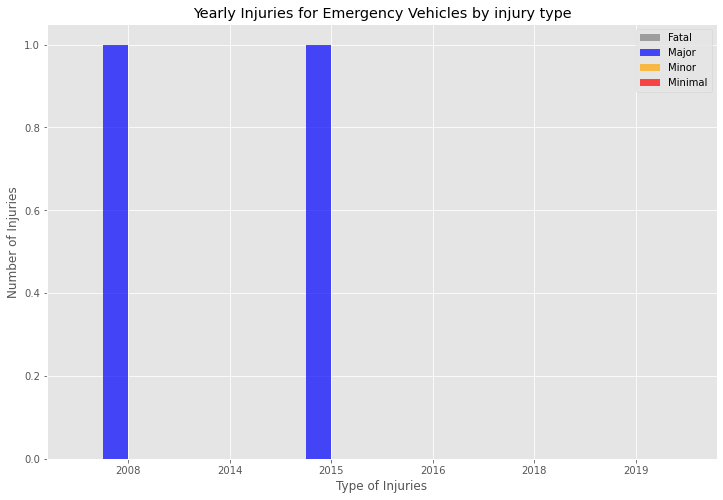

In [160]:
positions = list(range(len(emergency_vehicle_yearly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, emergency_vehicle_yearly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], emergency_vehicle_yearly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], emergency_vehicle_yearly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], emergency_vehicle_yearly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Yearly Injuries for Emergency Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = emergency_vehicle_yearly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

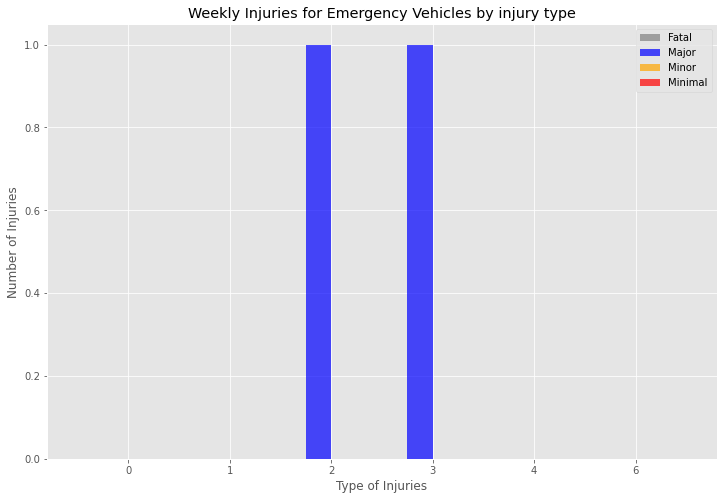

In [161]:
positions = list(range(len(emergency_vehicle_weekly.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, emergency_vehicle_weekly['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],emergency_vehicle_weekly['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], emergency_vehicle_weekly['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], emergency_vehicle_weekly['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Weekly Injuries for Emergency Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = emergency_vehicle_weekly.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

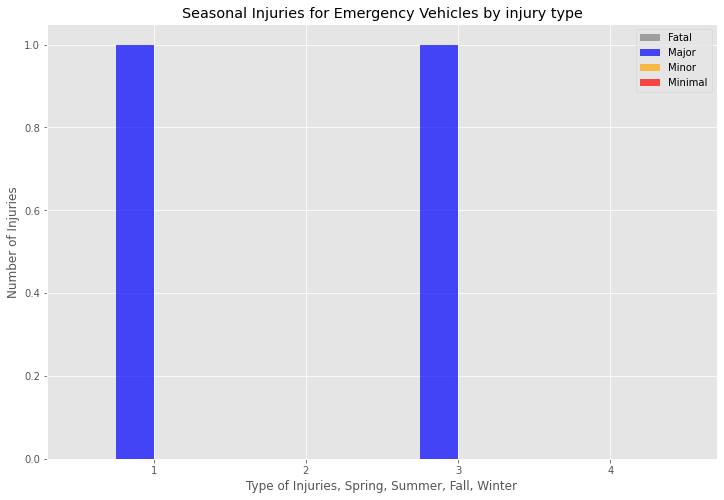

In [162]:
positions = list(range(len(emergency_vehicle_season.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, emergency_vehicle_season['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], emergency_vehicle_season['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], emergency_vehicle_season['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], emergency_vehicle_season['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for Emergency Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = emergency_vehicle_season.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

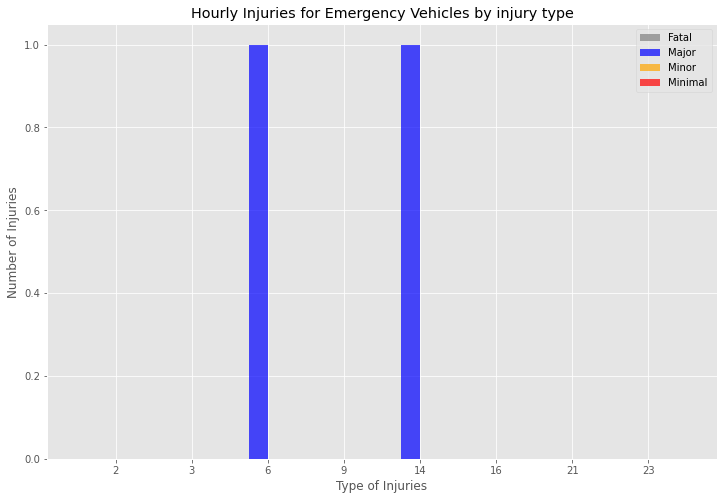

In [163]:
positions = list(range(len(emergency_vehicle_hr.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, emergency_vehicle_hr['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions],emergency_vehicle_hr['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], emergency_vehicle_hr['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], emergency_vehicle_hr['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Hourly Injuries for Emergency Vehicles by injury type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries",
       xticks = [p+1.5*width for p in positions], xticklabels = emergency_vehicle_hr.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()

In [164]:
ped_minmal_ssn = pedestrian_injuries.groupby('Season')['INJURY_Minimal_NUM'].sum()
ped_minor_ssn = pedestrian_injuries.groupby('Season')['INJURY_Minor_NUM'].sum()
ped_major_ssn = pedestrian_injuries.groupby('Season')['INJURY_Major_NUM'].sum()
ped_fatal_ssn = pedestrian_injuries.groupby('Season')['INJURY_Fatal_NUM'].sum()

In [165]:
pedestrian_total_injuries_ssn = pd.concat([ped_fatal_ssn,ped_major_ssn,ped_minmal_ssn,ped_minor_ssn],axis=1)

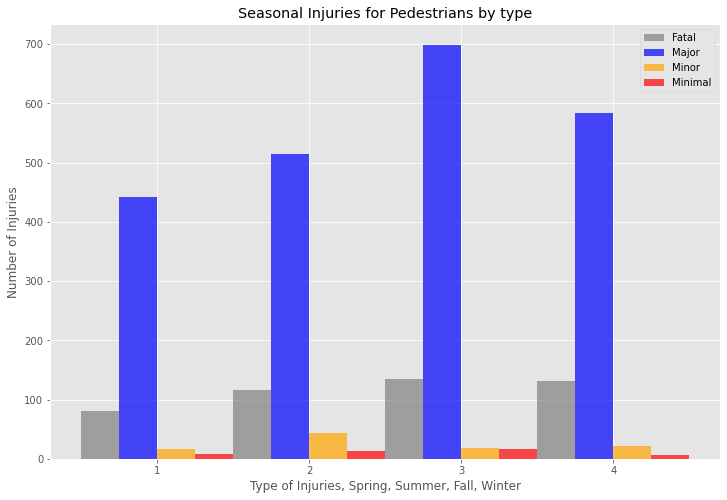

In [166]:
positions = list(range(len(pedestrian_total_injuries_ssn.index)))
width = 0.25

# plotting the bars
fix, ax = plt.subplots(figsize=(12,8))

# plotting fatal bar
plt.bar(positions, pedestrian_total_injuries_ssn['INJURY_Fatal_NUM'], 
        width, color = 'gray', alpha = 0.7, label='Fatal')
# plotting major, minor, and minimal bars, making sure the bars do not overlap 
plt.bar([p + width for p in positions], pedestrian_total_injuries_ssn['INJURY_Major_NUM'], 
        width, color ='blue', alpha = 0.7, label='Major')
plt.bar([p + width*2 for p in positions], pedestrian_total_injuries_ssn['INJURY_Minor_NUM'], 
        width, color = 'orange', alpha = 0.7, label='Minor')
plt.bar([p + width*3 for p in positions], pedestrian_total_injuries_ssn['INJURY_Minimal_NUM'], 
        width, color = 'red', alpha = 0.7, label='Minimal')

ax.set(title = 'Seasonal Injuries for Pedestrians by type',
       ylabel = 'Number of Injuries', xlabel = "Type of Injuries, Spring, Summer, Fall, Winter",
       xticks = [p+1.5*width for p in positions], xticklabels = pedestrian_total_injuries_ssn.index)

plt.legend(['Fatal','Major','Minor','Minimal'], loc = 'upper right')
plt.show()